## Mount Drive & Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import imutils
import numpy as np
import pandas as pd

### Loading Libraries

In [ ]:
#!pip install opendatasets
#!pip install chart_studio
#!pip install pytesseract 
#!pip install Pillow==9.0.0
#!pip install tesseract
#!sudo apt update
#!sudo apt install tesseract-ocr
#!sudo apt install libtesseract-dev

#########IF WORKING LOCAL ENV#########
#!pip install leptonica
#!pip install tesseract-ocr 
#brew install tesseract #On Mac

In [ ]:
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter
import opendatasets as od
from google.colab import drive

import cv2
import imutils
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.offline import iplot
from wordcloud import WordCloud

from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud, STOPWORDS

import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/landlord/handwriting-recognition/download", force = True)
#'xuetingggg'
#'64ac5b6588556f2e473ee95e49efc248'

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: xuetingggg
Your Kaggle Key: ··········


100%|██████████| 1.26G/1.26G [00:26<00:00, 51.8MB/s]


### Loading Results

In [ ]:
#filepath = '/content/drive/My Drive/ML/Data/Handwriting/'
filepath = '/content/drive/My Drive/MSCA_ML/Final_Project/Data/Handwriting/'

In [ ]:
import pandas as pd 
original = pd.read_csv(filepath + 'df_kmeans_cropped.csv', index_col = 0)
result =  pd.read_csv(filepath + 'df_ocr.csv', index_col = 0)

### Dataframe Compiling

In [ ]:
ocr_result = pd.DataFrame(columns = ['true_value', 'pred_value'])
ocr_result['true_value'] = original.IDENTITY
ocr_result['pred_value'] = result

In [ ]:
ocr_result['pred_value'] = ocr_result.pred_value.str.lower()

### Result Comparison

#### Train

In [ ]:
true_pred = ocr_result.shape[0]
true_pred

34306

Since there exists empty value, we fill the nulls with empty lists.

In [ ]:
ocr_result = ocr_result.fillna('')

Calculating correct rate for prediction and for character in prediction

In [ ]:
correct_char = 0
correct_pred = 0
total_char = 0

for i in range(ocr_result.shape[0]):
    true_name = ocr_result.loc[i, 'true_value']
    pred_name = ocr_result.loc[i, 'pred_value']
    total_char += len(true_name)
    
    for j in range(min(len(true_name), len(pred_name))):
        if pred_name[j] == true_name[j]:
            correct_char += 1
            
    if true_name == pred_name :
        correct_pred += 1 

In [ ]:
correct_char

118646

In [ ]:
#Total correct rate
correct_pred/ocr_result.shape[0] * 100

39.01941351367108

In [ ]:
#Char correct rate
correct_char/ total_char * 100

64.2607998613458

#### Test

In [ ]:
filepath = '/content/drive/My Drive/ML/Data/Handwriting/' #On Drive 
#filepath = '/content/drive/My Drive/MSCA_ML/Final_Project/Data/Handwriting/'

file_path_train = '/content/handwriting-recognition/train_v2/train/'
file_path_test = '/content/handwriting-recognition/test_v2/test/'
file_path_valid = '/content/handwriting-recognition/validation_v2/validation/'

In [ ]:
test_n_shape = pd.read_csv(filepath + 'test_n_shape.csv', index_col = 0)

In [ ]:
kmeans_boundary_list = [[(75, 0), (250, 35)], [(0, 10), (200, 40)], [(0, 0), (200, 40)], [(25, 35), (175, 65)]]

In [ ]:
test_n_shape.head()

,FILENAME,IDENTITY,height,width,dim,km_cluser
0,VALIDATION_0003.jpg,lea,31,284,3,1
1,VALIDATION_0016.jpg,antoine,31,284,3,1
2,VALIDATION_0022.jpg,mathis,44,324,3,2
3,VALIDATION_0032.jpg,hugo,30,388,3,0
4,VALIDATION_0039.jpg,clement,31,284,3,1


In [ ]:
test_text = []
for i in range(test_n_shape.shape[0]):
  org_image_dir =  file_path_valid+test_n_shape.loc[i, 'FILENAME']
  org_image = Image.open(org_image_dir)
  cluster_num = test_n_shape.loc[i, 'km_cluser']
  crop_dim = kmeans_boundary_list[cluster_num]
  crop_img = org_image.crop(crop_dim[0] + crop_dim[1])
  pred_text = pytesseract.image_to_string(crop_img)
  test_text.append(pred_text.strip())

In [ ]:
original_test = test_n_shape.IDENTITY

In [ ]:
test_text = list(map(lambda x: x.lower(), test_text))

In [ ]:
ocr_result_test = pd.DataFrame(columns = ['true_value', 'pred_value'])
ocr_result_test['true_value'] = original_test
ocr_result_test['pred_value'] = test_text

In [ ]:
ocr_result_test = ocr_result_test.fillna('')

In [ ]:
correct_char = 0
correct_pred = 0
total_char = 0

for i in range(ocr_result_test.shape[0]):
    true_name = ocr_result_test.loc[i, 'true_value']
    pred_name = ocr_result_test.loc[i, 'pred_value']
    total_char += len(true_name)
    
    for j in range(min(len(true_name), len(pred_name))):
        if pred_name[j] == true_name[j]:
            correct_char += 1
            
    if true_name == pred_name :
        correct_pred += 1 

In [ ]:
ocr_result_test.to_csv('df_ocr_test.csv')

In [ ]:
#Total correct rate
correct_pred/ocr_result_test.shape[0] * 100

30.311418685121104

In [ ]:
#Char correct rate
correct_char/ total_char * 100

54.260474291350405

### Visualization

In [ ]:
#ocr_result_test = pd.read_csv(filepath + 'df_ocr_test.csv')

In [ ]:
original.head()

,0,1,2,3,4,5,6,7,8,9,...,6992,6993,6994,6995,6996,6997,6998,6999,IDENTITY,tokenized
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,lucie,"[[3, 12, 13, 6, 2]]"
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,emma,"[[2, 5, 5, 1]]"
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,romain,"[[11, 8, 5, 1, 6, 4]]"
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,thomas,"[[7, 9, 8, 5, 1, 10]]"
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,ines,"[[6, 4, 2, 10]]"


In [ ]:
result['actual_identity'] = original.IDENTITY

In [ ]:
result.rename(columns = {'0':'prediction'}, inplace = True)

In [ ]:
train_n_shape = pd.read_csv(filepath + 'train_n_shape.csv')

In [ ]:
result.head(10)

,prediction,actual_identity
0,Lcocie,lucie
1,EWWG,emma
2,Rom4i yw,romain
3,THOMAS,thomas
4,SAG S,ines
5,Antorne,antoine
6,ENZO,enzo
7,THeMmAs,thomas
8,NaN,theo
9,EMMA\n\nSas oe Sta as,emma


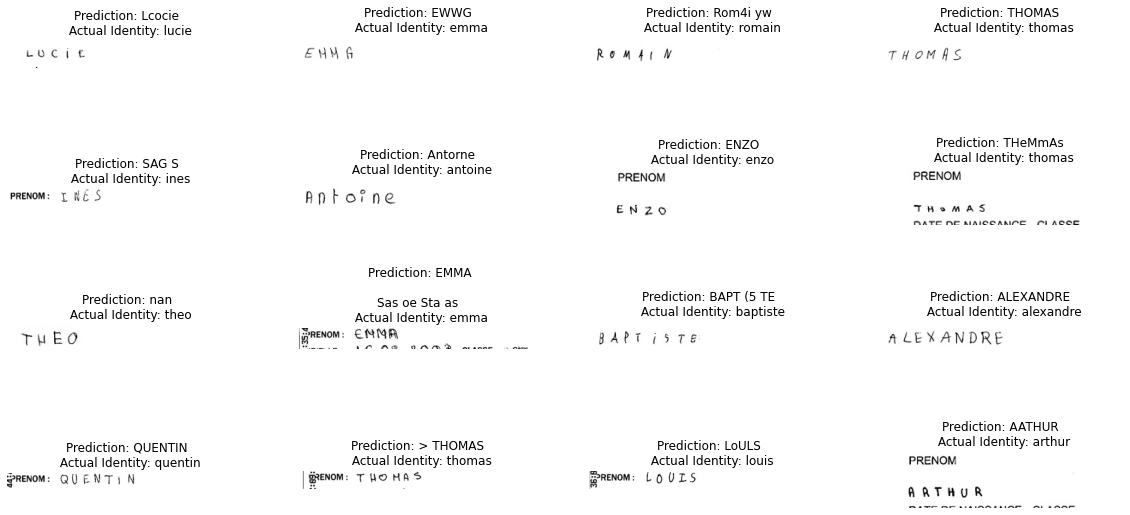

In [ ]:
_, ax = plt.subplots(4, 4, figsize=(20, 10))
for i in range(16):
    img_dir = file_path_train+train_n_shape.loc[i, 'FILENAME']
    img = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    title = f"Prediction: {result.loc[i,'prediction']} \n Actual Identity: {result.loc[i,'actual_identity']}"
    ax[i // 4, i % 4].imshow(img, cmap="gray")
    ax[i // 4, i % 4].set_title(title)
    ax[i // 4, i % 4].axis("off")
plt.show()